In the real world, it's much more common for databases to have data in more than one table. If we want to be able to work with that data, we'll have to combine multiple tables within a query. The way we do this in `SQL` is using **joins**. 

We're going to be using a version of the **CIA World Factbook (Factbook)** database

In addition to the **facts** table we've added a new table, called **cities** which contains information on major urban areas from countries in the `Factbook`

Description of what each column represents:

* `id` - A unique ID for each city.
* `name` - The name of the city.
* `population` - The population of the city.
* `capital` - Whether the city is a capital city: 1 if it is, 0 if it isn't.
* `facts_id` - The ID of the country, from the facts table.

The last column is of particular interest to us, as it is a column of data that also exists in our original `facts` table. This link between tables is important as it's used to combine the data in our queries.

The most common way to join data using SQL is using an **inner join**. The syntax for an inner join is:

`SELECT [column_names] FROM [table_name_one]
INNER JOIN [table_name_two] ON [join_constraint];`

The inner join clause is made up of two parts:

1. `INNER JOIN`, which tells the SQL engine the name of the table we wish to join in our query, and that we wish to use an inner join.

2. `ON`, which tells the SQL engine what columns to use to join the two tables.

Joins are usually used in a query after the `FROM` clause. 

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql

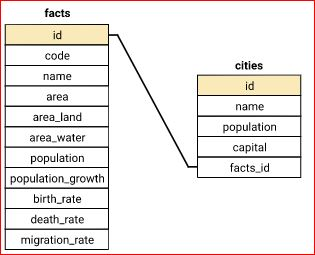

In [2]:
from IPython.display import Image
Image("Facts and Cities.JPG")

In [3]:
conn = sql.connect("factbook.db")

q = '''Select * from sqlite_master where type = "table"'''

pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [4]:
#query that returns all columns from the facts and cities tables.

q  = """Select * From facts
    Inner Join cities on facts.id = cities.facts_id limit 5""";

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184


Above query gives us all columns from both tables and every row where there is a match between the `id` column from **facts** and the `facts_id` from **cities**, limited to the first 5 rows.

An **inner join** works by including only rows from each table that have a match as specified using the **ON** clause.

We can also create aliases for table names, which makes queries with joins easier to both read and write.

We can also combine aliases with wildcards - for instance, using the aliases `c.*` would give us all columns from the table `cities`.

In [5]:
def read_query(q):
    return pd.read_sql_query(q, conn)

In [6]:
# query that:
# Joins cities to facts using an INNER JOIN.
# Includes, in order:
# All columns from cities.
# The name column from facts aliased to country_name.

q = '''Select c.*,f.name country_name from facts f
       Inner Join cities c 
       on c.facts_id = f.id
       Limit 5'''

read_query(q)

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


In [7]:
# query that uses an INNER JOIN to join the two tables in your query and returns, in order:
# A column of country names, called country.
# A column of each country's capital city, called capital_city.
# We're only interested in the capital cities from the cities table

q = '''Select f.name country, c.name capital_city from facts f
    Inner join cities c on c.facts_id = f.id
    Where c.capital = 1'''
read_query(q)

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
...,...,...
203,Samoa,Apia
204,Swaziland,Mbabane
205,Yemen,Sanaa
206,Zambia,Lusaka


# left join.

A left join includes all the rows that an inner join will select, plus any rows from the first (or left) table that don't have a match in the second table.

The rows where `facts.id` doesn't match any values in `cities.facts_id`, the rows are still included in the results. When this happens, all of the columns from the cities table are populated with **null** values.

When making a comparison to `null` in **SQL**, we use the `IS` keyword, rather than the `=` sign. If we want to select rows where a column is **null** we can write:

`WHERE column_name IS NULL`

If we want to select rows where a column name **isn't null**, we use:

`WHERE column_name IS NOT NULL`

In [20]:
# query that returns the countries that don't exist in cities:
# query should return two columns:
# The country names, with the alias country.
# The country population.
# Use a LEFT JOIN to join cities to facts.
# Include only the countries from facts that don't have a corresponding value in cities.

q = '''Select f.name country, c.population population from facts f
       left join cities c on f.id = c.facts_id
       where c.name Is Null'''

read_query(q)

,country,population
0,Kosovo,None
1,Monaco,None
2,Nauru,None
3,San Marino,None
4,Singapore,None
5,Holy See (Vatican City),None
6,Taiwan,None
7,European Union,None
8,Ashmore and Cartier Islands,None
9,Christmas Island,None


Looking through the results of the query we wrote, we can see a number of different reasons that countries don't have corresponding values in cities:

**Countries** with small populations and/or no major urban areas (which are defined as having populations of over 750,000), eg `San Marino`, `Kosovo`, and `Nauru`. 

**City-states**, such as `Monaco` and `Singapore`.

**Territories** that are not themselves countries, such as `Hong Kong`, `Gibraltar`, and the `Cook Islands`.

**Regions & Oceans** that aren't countries, such as the `European Union` and the `Pacific Ocean`.

Genuine cases of missing data, such as `Taiwan`.

There are two less-common join types SQLite does not support that we should be aware of. The first is a **right join**. 

A **right join**, as the name indicates, is exactly the opposite of a **left join**. While the left join includes all rows in the table before the `JOIN` clause, the right join includes all rows in the new table in the `JOIN` clause. 

The other join type not supported by SQLite is a **full outer join**. A full outer join will include all rows from the tables on both sides of the join

Like right joins, full outer joins are reasonably uncommon, and similar results can be achieved using a **union** clause

The standard SQL syntax for a full outer join is:

`SELECT f.name country, c.name city
FROM cities c
FULL OUTER JOIN facts f ON f.id = c.facts_id
LIMIT 5;`

There is a handy shortcut we can use in our queries which lets us skip the column names, and instead use the order in which the columns appear in the `SELECT` clause. In this instance, `migration_rate` is the second column in our `SELECT` clause so we can just use **2** instead of the column name:

`SELECT name, migration_rate FROM FACTS
ORDER BY 2 desc;`

We can use this shortcut in either the `ORDER BY` or `GROUP BY` clauses. Be mindful that we want to ensure our queries are still readable, so typing the full column name may be better for more complex queries.

In [25]:
# query that returns the 10 capital cities with the highest population ranked from biggest to smallest population.
# We should include the following columns, in order:
# capital_city, the name of the city.
# country, the name of the country the city is from.
# population, the population of the city.

q = '''Select c.name capital_city, f.name country, c.population population 
       From cities c
       Inner join facts f on f.id = c.facts_id
       Order By 3 Desc
       Limit 10'''

read_query(q)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,New York-Newark,United States,20352000
4,Shanghai,China,20208000
5,Sao Paulo,Brazil,19924000
6,Mumbai,India,19744000
7,Beijing,China,15594000
8,Dhaka,Bangladesh,15391000
9,Marseille-Aix-en-Provence,France,14890100


Subqueries can be used to substitute parts of queries, allowing us to find the answers to more complex questions. We can also join to the result of a subquery, just like we could a table.

In [30]:
# a query that returns capital cities with populations of over 10 million ordered from largest to smallest. Include the following columns:
# capital_city - the name of the city.
# country - the name of the country the city is the capital of.
# population - the population of the city.

q = '''Select c.name capital_city, f.name country, c.population population 
       From cities c 
       Inner Join facts f
       On f.id = c.facts_id
       Where c.population > 10000000 And c.capital = 1
       Order by 3 Desc'''
read_query(q)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


In [31]:
# Alternative method of above query
q = """SELECT c.name capital_city, f.name country, c.population from facts f 
    INNER join (SELECT * from cities where capital = 1 and population > 10000000) c 
    on c.facts_id = f.id 
    order by c.population DESC"""

read_query(q)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


When we're writing complex queries with joins and subqueries, it helps to follow this process:

* Think about what data we need in our final output
* Work out which tables we'll need to join, and whether we will need to join to a subquery.
* If we need to join to a subquery, write the subquery first.
* Then start writing our `SELECT` clause, followed by the join and any other clauses we will need.
* Don't be afraid to write our query in steps, running it as we go— for instance we can run our subquery as a 'stand alone' query first to make sure it looks like we want before writing the outer query.

We will be writing a query to find the countries where the urban center (city) population is more than half of the country's total population

The query we will write will include:

* A join to a subquery.
* A subquery to make a calculation.
* An aggregate function.
* A `WHERE` clause.
* A `CAST` expression.

In [43]:
# query should include:
# The following columns, in order:
# country, the name of the country.
# urban_pop, the sum of the population in major urban areas belonging to that country.
# total_pop, the total population of the country.
# urban_pct, the percentage of the popularion within urban areas, calculated by dividing urban_pop by total_pop.
# Only countries that have an urban_pct greater than 0.5.
# Rows should be sorted by urban_pct in ascending order.

q = '''Select f.name country, c.urban_pop urban_pop, f.population total_pop, 
Cast(c.urban_pop as flaot)/cast(f.population as Float) urban_pct
       From facts f 
       Inner Join (Select facts_id, Sum(Population) urban_pop from cities Group by 1) c 
       On f.id = c.facts_id
       Where urban_pct > 0.5
       Order By urban_pct'''
read_query(q)


,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248
